# **Bitly Data from 1.USA.gov**

*Chú thích: Nên chạy notebook theo thứ tự để tránh phát sinh lỗi không mong muốn*

Tổng quan: Bộ dữ liệu ẩn hợp tác giữa Bitly và trang web chính phủ Hoa Kỳ USA.gov về người dùng khi họ rút ngắn các liên kết được kết thúc bằng .gov hoặc .mil. Bộ dữ liệu từng được thu thập và có thể tải trực tiếp vào năm 2011. Tuy nhiên chương trình hợp tác trên đã kết thúc đúng tại thời điểm cuốn sách Pydata Book 3rd Edition được biên soạn vào năm 2022.

Người dùng có thể truy cập dữ liệu này thông qua đường liên kết đến github: https://github.com/wesm/pydata-book

**Clone dataset từ github: https://github.com/wesm/pydata-book**

In [1]:
!git clone https://github.com/wesm/pydata-book.git

Cloning into 'pydata-book'...
remote: Enumerating objects: 558, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 558 (delta 24), reused 7 (delta 4), pack-reused 525 (from 1)
Receiving objects: 100% (558/558), 63.76 MiB | 17.09 MiB/s, done.
Resolving deltas: 100% (210/210), done.
Updating files: 100% (209/209), done.


-------------------------------

## 1. TRUY CẬP DỮ LIỆU

**Import thư viện**

In [2]:
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

**Nạp dữ liệu vào notebook**

In [5]:
path = '/content/pydata-book/datasets/bitly_usagov/example.txt'

# Convert to python dictionary.
records = [json.loads(line) for line in open(path)]

# Show record 0
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

---

## 2. KHAI PHÁ VÀ XỬ LÝ DỮ LIỆU

BẢNG Ý NGHĨA CÁC TRƯỜNG DỮ LIỆU

| # | Column | Meaning | #  | Column      | Meaning |
|---|--------|---------|----|-------------|---------|
| 0 | a      | browser, device, application used | 9  | hh          |         |
| 1 | c      |         | 10 | r           |         |
| 2 | nk     |         | 11 | u           |         |
| 3 | tz     |timezone | 12 | t           |         |
| 4 | gr     |         | 13 | hc          |         |
| 5 | g      |         | 14 | cy          |         |
| 6 | h      |         | 15 | ll          |         |
| 7 | l      |         | 16 | _heartbeat_ |         |
| 8 | al     |         | 17 | kw          |         |

#### A. Time Zones

1. ĐẾM TIME ZONES VỚI PYTHON THUẦN TÚY

In [20]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [23]:
# Initiate count function
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [24]:
counts = get_counts(time_zones)

In [25]:
counts['Africa/Cairo']

3

In [26]:
def top_counts(count_dict, n=10):
  value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
  value_key_pairs.sort()
  return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [27]:
# Count python collection

from collections import Counter

counts = Counter(time_zones)

In [28]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

----

2. ĐẾM TIME ZONES VỚI PANDAS

- **Result summarized**

In [29]:
# Create DataFrame

frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [30]:
frame["tz"].head()

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York


  - **View by each of Time Zones**

In [31]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


- **Visualized by matplotlib**

<Axes: ylabel='tz'>

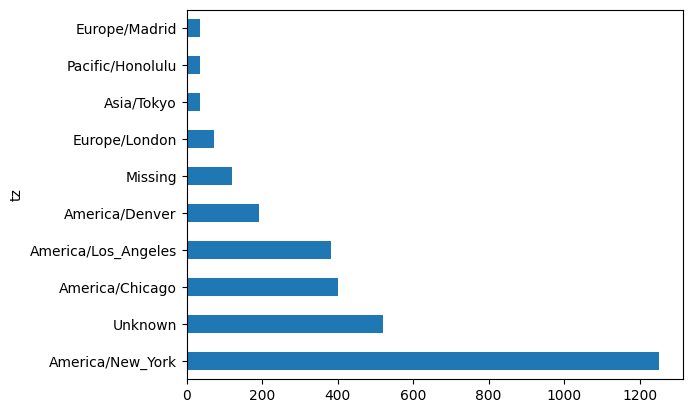

In [32]:
clean_tz = frame["tz"].fillna("Missing")

clean_tz[clean_tz == ""] = "Unknown"

tz_counts = clean_tz.value_counts()

tz_counts[:10].plot(kind="barh", rot=0)

- **Visualized by seaborn**

/tmp/ipython-input-1433496981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=subset.index, x=subset.to_numpy(), palette="tab10")


<Axes: ylabel='tz'>

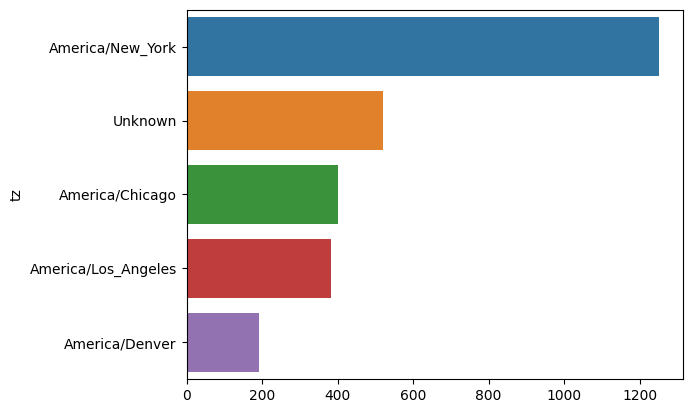

In [38]:
subset = tz_counts.head()

sns.barplot(y=subset.index, x=subset.to_numpy(), palette="tab10")

---

3. XỬ LÝ DỮ LIỆU TRONG MIỀN a

In [39]:
# Example data in a field
frame["a"][1]

'GoogleMaps/RochesterNY'

In [40]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [41]:
frame["a"][50][:50] # long line

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/2010'

- Ta có thể thấy trường dữ liệu "a" bao gồm rất nhiều thông tin như thiết bị, phiên bản ứng dụng hay browser truy cập vào bitly khi tạo đường dẫn rút gọn.

- Tách đoạn ký tự đầu tiên và tổng hợp chúng làm thành một bộ miêu tả hành vi người dùng.

In [43]:
# Split off the first token in the string
results = pd.Series(x.split()[0] for x in frame.a.dropna())
results.head(5)

,0
0,Mozilla/5.0
1,GoogleMaps/RochesterNY
2,Mozilla/4.0
3,Mozilla/5.0
4,Mozilla/5.0


In [44]:
# Counting
results.value_counts()[:8]

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4


4. PHÂN TÍCH DỮ LIỆU TIMEZONE VÀ MIỀN a

- Lọc dữ liệu missing trong miền a (phần đã tách ở mục 3)

In [45]:
cframe = frame[frame["a"].notna()].copy()

- Phân vùng dữ liệu thành Window và Non-window

In [46]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

In [47]:
cframe["os"].head(5)

,os
0,Windows
1,Not Windows
2,Windows
3,Not Windows
4,Windows


- Phân nhóm "tz" và "os"

In [48]:
by_tz_os = cframe.groupby(["tz", "os"])

- Đếm số nhóm

In [50]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


- Chọn top overall time zones

In [51]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

- Kết quả thực hiện theo thứ tự

In [52]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


- Thực hiện với pandas nlargest

In [53]:
agg_counts.sum(axis="columns").nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


- Sắp xếp lại bộ dữ liệu cho tương thích với seaborn

In [54]:
count_subset = count_subset.stack()

count_subset.name = "total"

count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


- Visualize

<Axes: xlabel='total', ylabel='tz'>

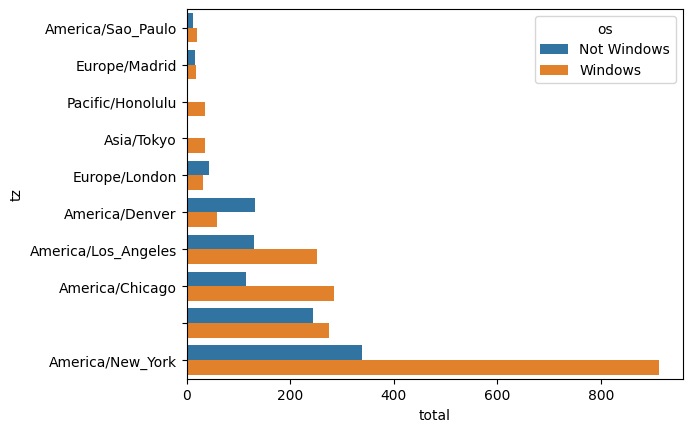

In [55]:
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

- Biểu đồ trên chưa thể hiện rõ sự tương quan về phần trăm đối với người dùng Window trong các nhóm time zone nhỏ, vì thế ta sẽ thay độ phần trăm giữa các nhóm thành tổng của 1

In [56]:
def norm_total(group):
  group["normed_total"] = group["total"] / group["total"].sum()
  return group

results = count_subset.groupby("tz").apply(norm_total)

/tmp/ipython-input-1308235100.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


- Visualize

<Axes: xlabel='normed_total', ylabel='tz'>

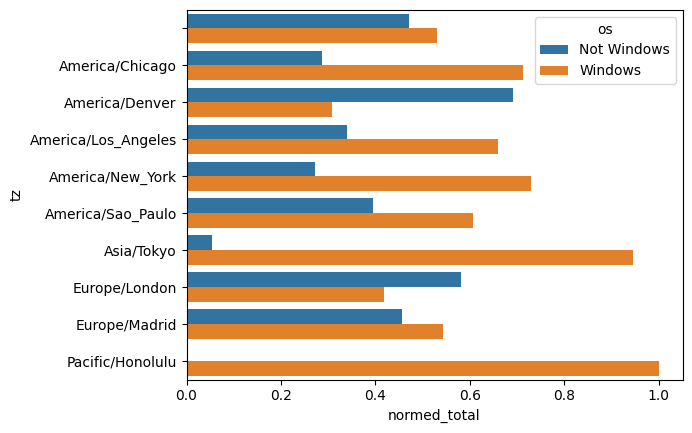

In [57]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

Từ biểu đồ trên ta có thể thấy được:

- Phần trăm người dùng sử dụng các thiết bị Window ở những khu vực đông đúc chiếm tương đối cao.
- Riêng đối với khu vực London EU thì phần trăm cao hơn bởi người dùng sử dụng các nền tảng khác.

Ngoài ra, có thể tính tổng được chuẩn hóa theo cách hiệu quả hơn bằng cách dùng phương pháp transform với groupby:

In [58]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")